In [17]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt # data visulaization libariry
import seaborn as sns #data 
Microsoft_Data= pd.read_csv("Microsoft_Data.csv")

y=Microsoft_Data['HasDetections']
Microsoft_Data.drop(columns='HasDetections',inplace=True)

# this is missing value thecnique
missing_value_percentage_df=pd.DataFrame({'Column_Name':Microsoft_Data.columns,
                               'Missing_Values_Count':Microsoft_Data.isnull().sum(),
                               'Missing_Values_Percentage':Microsoft_Data.isnull().sum()/Microsoft_Data.shape[0]*100})


missing_value_percentage_df=missing_value_percentage_df.sort_values(by='Missing_Values_Percentage',ascending=False)





In [18]:
cols_to_drop=[]

cols_with_missing_values_grt_50=list(missing_value_percentage_df[missing_value_percentage_df['Missing_Values_Percentage']>50].index)

for col in Microsoft_Data.columns:
    if Microsoft_Data[col].nunique()== Microsoft_Data.shape[0] or Microsoft_Data[col].nunique()==1:
        cols_to_drop.append(col)

columns_to_drop=cols_to_drop+cols_with_missing_values_grt_50

Microsoft_Data.drop(columns=columns_to_drop,inplace=True)
Microsoft_Data.shape

(56756, 71)

In [19]:
for col in Microsoft_Data.columns:
    if col!='Census_SystemVolumeTotalCapacity':
        Microsoft_Data[col]= Microsoft_Data[col].astype(object)

Microsoft_Data['Census_SystemVolumeTotalCapacity'].dtype

dtype('float64')

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Microsoft_Data,y,test_size=0.3,random_state=43)

#filling missing values

for col in x_train.columns:
    if x_train[col].dtype=='object':
        x_train[col]=x_train[col].fillna(x_train[col].mode()[0]).astype(object)
        x_test[col]=x_test[col].fillna(x_train[col].mode()[0]).astype(object)
        
    else:
        x_train[col]=x_train[col].fillna(x_train[col].mean())
        x_test[col]=x_test[col].fillna(x_train[col].mean())
#x_train.dtypes
x_test

C:\Users\GTANNIRU\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GTANNIRU\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\GTANNIRU\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
13598,win8defender,1.1.14901.4,4.16.17656.18052,1.269.1235.0,7,0,62773,1,1,1,...,Retail,554,33084,1,0,0,0,0,0,11
33292,win8defender,1.1.15200.1,4.9.10586.1106,1.275.209.0,7,0,53447,1,1,1,...,Retail,554,33043,1,0,0,0,0,1,11
5740,win8defender,1.1.15200.1,4.18.1807.18075,1.275.727.0,7,0,53447,1,1,1,...,Retail,355,19970,0,0,0,0,0,0,10
9953,win8defender,1.1.15200.1,4.18.1807.18075,1.275.173.0,7,0,53447,1,1,1,...,WIS,556,64568,0,0,0,0,0,1,7
33662,win8defender,1.1.15100.1,4.18.1807.18075,1.273.866.0,7,0,53447,1,1,1,...,Retail,628,36144,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33037,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,7,0,53447,1,1,1,...,Retail,142,63817,0,0,0,0,0,0,11
47967,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1494.0,7,0,53447,1,1,1,...,Retail,554,33088,0,0,0,0,0,0,10
19042,win8defender,1.1.15200.1,4.10.14393.0,1.275.903.0,7,0,53447,1,1,1,...,Retail,628,8791,1,0,0,0,0,0,11
40085,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1652.0,7,0,53447,1,1,1,...,Retail,554,33070,1,0,0,0,0,0,1


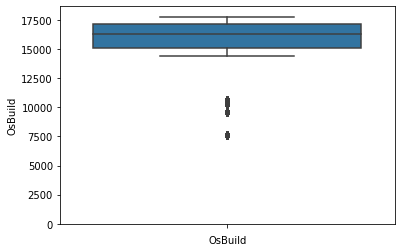

In [36]:
import pandas as pd
import matplotlib.pyplot as plt # data visulaization libariry
import seaborn as sns #data 
Microsoft_Data= pd.read_csv("Microsoft_Data.csv")
Microsoft_Data
Microsoft_Data.shape
missing_values_df=pd.DataFrame({'Column_Name':Microsoft_Data.columns,
                               'Missing_Values_Count':Microsoft_Data.isnull().sum(),
                               'Missing_Values_Percentage':Microsoft_Data.isnull().sum()/Microsoft_Data.shape[0]*100})

missing_values_df
missing_values_df=missing_values_df.sort_values(by='Missing_Values_Percentage',ascending=True)
missing_values_df
Microsoft_Data['HasDetections'].value_counts()
Microsoft_Data['OsBuild'].value_counts()
Microsoft_Data['OsBuild'].dtype
Microsoft_Data['OsBuild']=Microsoft_Data['OsBuild'].astype('object')# to convert int to 'object '
Microsoft_Data['OsBuild'].dtype
Microsoft_Data['OsBuild'].value_counts()
#cols_to_drop=list(missing_values_df[missing_values_df['Missing_Values_Percentage']>50]['Column_Name'])

#Microsoft_Data.drop(columns=cols_to_drop,inplace=True) #'inplace' is the operator to drop the perticular
                                                            #column in original data

#Microsoft_Data.columns
#sns.distplot(Microsoft_Data['OsBuild'])
#sns.boxplot(Microsoft_Data['OsBuild'],orient='v')

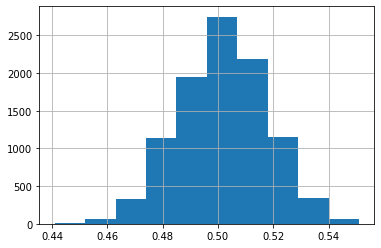

In [35]:
# Here we apply centreal limit theorem for the column named by 'salesprice'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import os

sampled_means=[]

for i in range(0,10000):
    sampled_means.append(Microsoft_Data['HasDetections'].sample(n=1000).mean())

pd.Series(sampled_means).hist(bins=10)

In [30]:
# to catgorical variables of their chai_square vlues and p-values
#result=Microsoft_Data.dtypes
#print(result)
obj_columns=list([col for col in Microsoft_Data.columns if Microsoft_Data[col].dtype=='object'])
p_values_list[]
#obj_columns
#Microsoft_Data['ProductName'].dtype
for col

dtype('O')

In [ ]:
p_values_df=pd.DataFrame({'column_Name':obj_cols'p_values':p_values_list})
p_values_df

In [46]:
import scipy.stats # chai square test

crosstab= pd.crosstab(Microsoft_Data['OsBuild'],Microsoft_Data['HasDetections']) #build contingency

result=scipy.stats.chi2_contingency(crosstab) #output the chi-square test statistic, p-value and degrees of freedom
result

(158.07149922833526,
 1.434114178500418e-17,
 35,
 array([[1.99478469e+00, 2.00521531e+00],
        [3.11186412e+02, 3.12813588e+02],
        [5.93947142e+02, 5.97052858e+02],
        [8.54266545e+02, 8.58733455e+02],
        [1.30359180e+03, 1.31040820e+03],
        [2.31195546e+03, 2.32404454e+03],
        [2.53138177e+03, 2.54461823e+03],
        [7.91580436e+03, 7.95719564e+03],
        [1.24155399e+04, 1.24804601e+04],
        [4.98696173e-01, 5.01303827e-01],
        [4.98696173e-01, 5.01303827e-01],
        [1.49608852e+00, 1.50391148e+00],
        [4.98696173e-01, 5.01303827e-01],
        [9.97392346e-01, 1.00260765e+00],
        [4.98696173e-01, 5.01303827e-01],
        [4.98696173e-01, 5.01303827e-01],
        [7.48044260e+00, 7.51955740e+00],
        [4.98696173e-01, 5.01303827e-01],
        [4.98696173e+00, 5.01303827e+00],
        [4.98696173e-01, 5.01303827e-01],
        [4.98696173e-01, 5.01303827e-01],
        [2.99217704e+00, 3.00782296e+00],
        [7.48044260e+00, 7

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           3.68e-85
Time:                        11:57:04   Log-Likelihood:                -1180.8
No. Observations:                 398   AIC:                             2372.
Df Residuals:                     393   BIC:                             2392.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.5500      2.366      8.

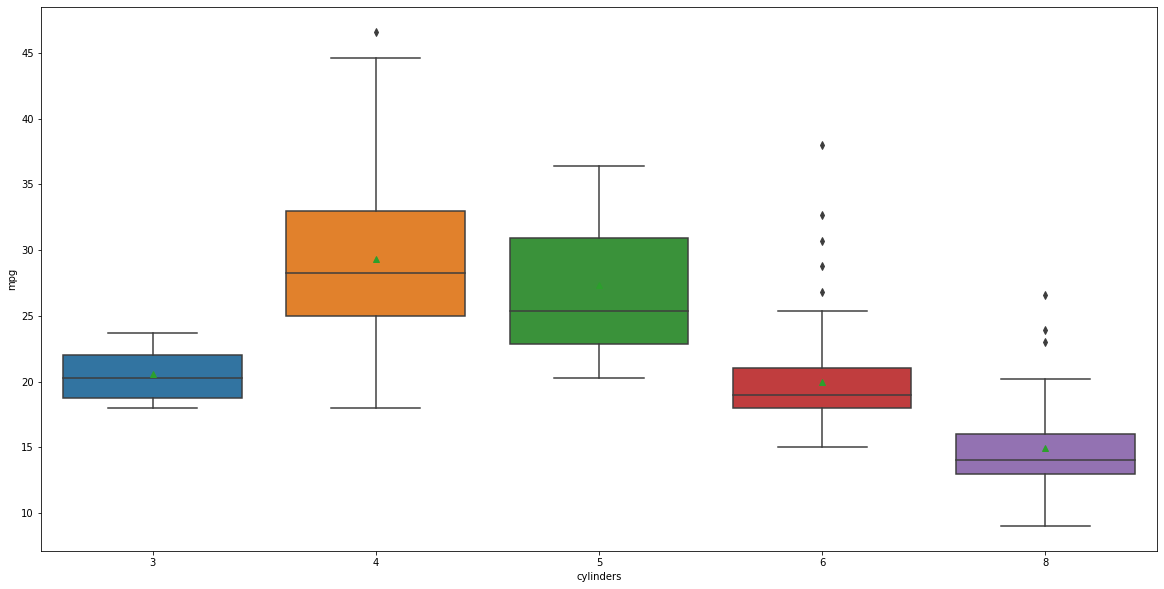

In [12]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np # data logerthem library
import matplotlib.pyplot as plt # data visulaization libariry
import seaborn as sns #data visulaization libariry

plt.figure(figsize=(20,10))

data=pd.read_csv("auto-mpg.data",delim_whitespace=True, header=None, usecols=[0,1],
                 names=['mpg','cylinders'], dtype={'mpg':np.float64,'cylinders':'category'})

sns.boxplot(x=data['cylinders'],y=data['mpg'],showmeans=True)

#plt.show
#fitting the Anova model
model=smf.ols(formula='mpg ~ cylinders',data=data)
results=model.fit()
print(results.summary())# F-statistic & prob(ststistic)i.e p-value are the values to look out for.

In [5]:
#Central limit theorem

#import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visulaization libariry
#import seaborn as sns #data 
import random

#np.random.seed(48) # to generate the same values for different iterations

plt.figure(figsize=(20,5))
#create an empty dataframe
population=pd.DataFrame()

#Create an column that is 10000 random numbers drawn from a uniform distribution
population['numbers']=np.random.uniform(0,1000,size=10000)
population['numbers']

0       605.208439
1       478.611219
2       367.538066
3       641.155447
4       534.627134
           ...    
9995    846.169929
9996    248.008629
9997    910.494557
9998    548.619616
9999    731.935909
Name: numbers, Length: 10000, dtype: float64

<Figure size 1440x360 with 0 Axes>

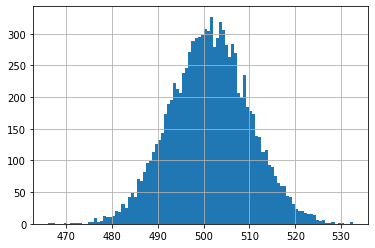

In [20]:
import os
sampled_means=[] # creating a list to store the sample means
# for 1000 times
for i in range(0,10000):
    #take a random sample of 1000 rows from the population, take the mean of those rows, append to sample_means
    sampled_means.append(population['numbers'].sample(n=1000).mean())
    
    # Here population is any dataframe name, 'numbres' is column name, and observed sample is with in the range

#plot a histogram of sample_means
#it is clearly normally distributed and centered around 5000
pd.Series(sampled_means).hist(bins=100)
